<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Assignment_CE888/blob/main/Program/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Libraries for pre-processing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

**Mobile price dataset**

In [10]:
moblie_data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/Assignment_CE888/main/Datasets/mobile_price_classification.csv')
moblie_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
moblie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
moblie_data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [13]:
# group the data into two classes (binary classification)
label = {'price_range':{1:0, 2:1, 3:1}}
moblie_data.replace(label, inplace=True)
moblie_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0


In [14]:
moblie_data['price_range'].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

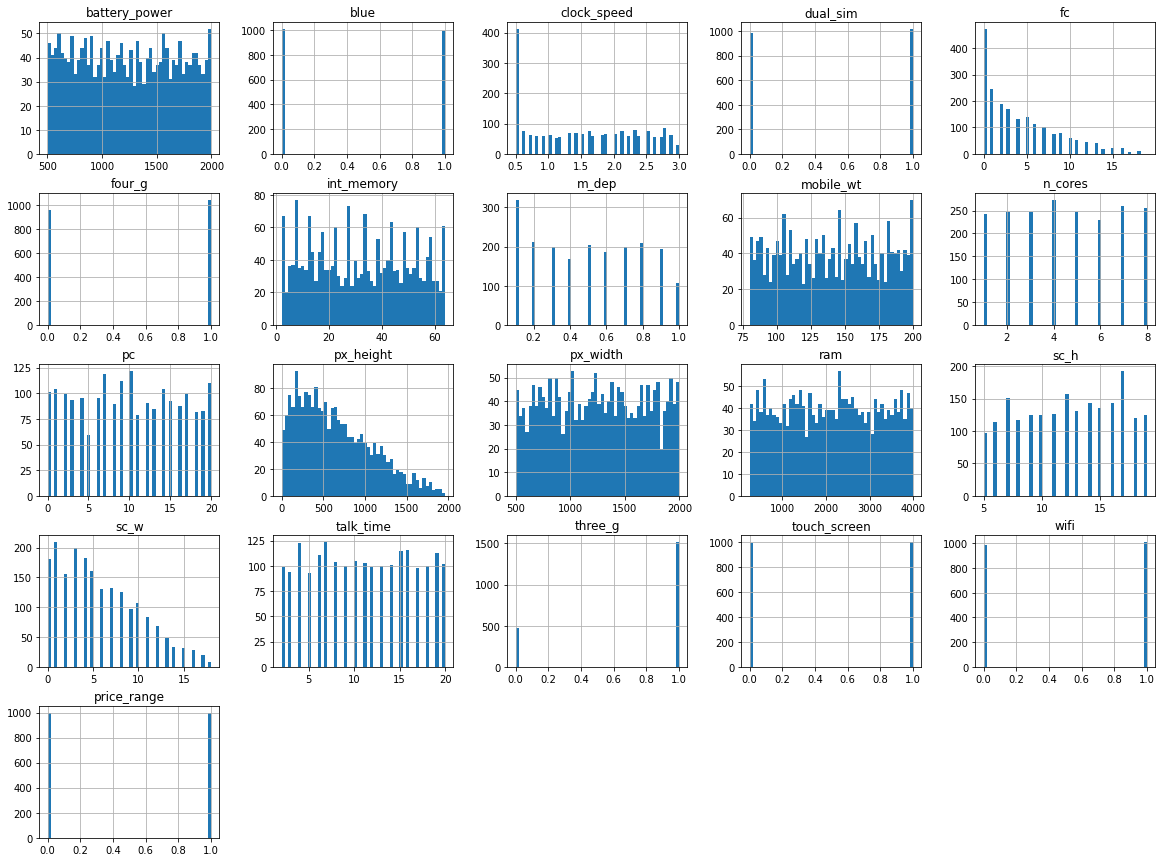

In [15]:
# plot histogram to see how the data distributed and categorical data
_ = moblie_data.hist(bins=50, figsize=(20,15))

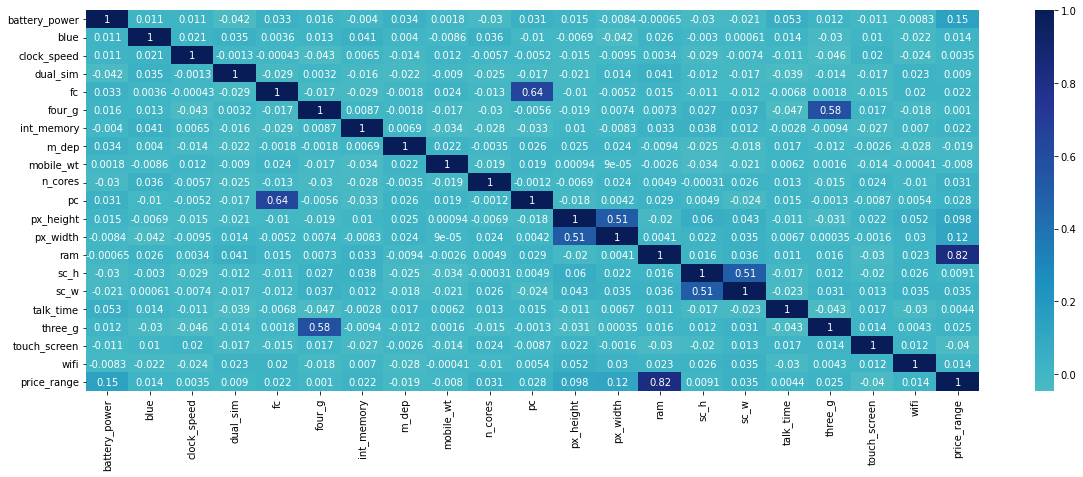

In [16]:
# Calculate the correlations between each pair of variables and plot on the heatmap
correlations = moblie_data.corr()

f, ax = plt.subplots(figsize=(20, 7))
ax = sns.heatmap(correlations, annot=True, center=0,  cmap="YlGnBu")

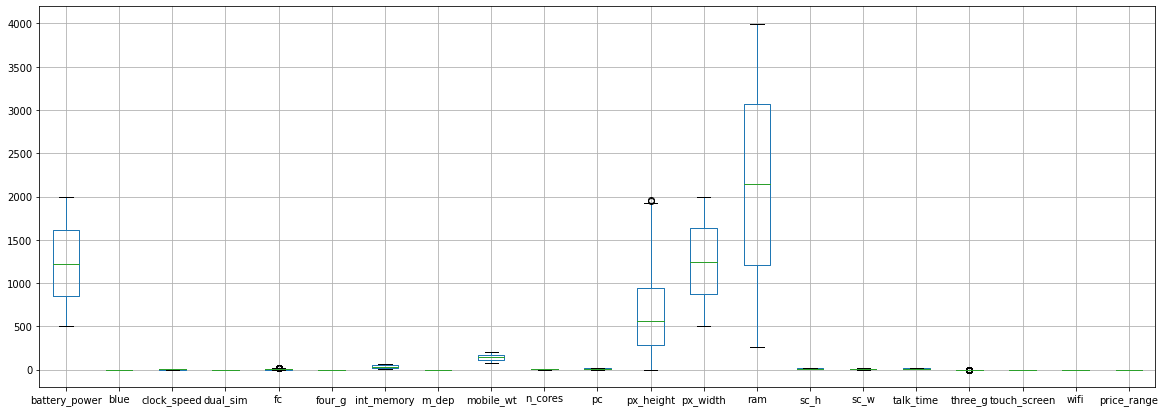

In [18]:
# plot the boxplot to see the scal of the data
f, ax = plt.subplots(figsize=(20, 7))
column = list(moblie_data.columns)
ax = moblie_data.boxplot(column= column)  

In [21]:
moblie_data.sort_values('price_range', axis=0,ascending=True)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1,0
820,1387,0,0.5,0,0,1,61,0.5,98,3,0,785,1151,629,5,3,11,1,1,0,0
1567,940,0,2.9,0,0,0,16,0.7,115,4,1,499,1090,2192,15,13,9,1,1,1,0
823,1593,1,1.0,0,0,1,52,0.7,130,8,0,761,1336,1354,15,13,13,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,840,0,0.6,0,0,1,63,0.8,137,7,19,987,1081,3486,12,8,18,1,1,0,1
847,1843,1,1.8,1,13,1,16,0.7,134,6,18,118,580,3213,15,14,15,1,1,0,1
844,1986,0,0.5,0,7,0,51,0.4,95,3,9,342,774,3165,5,0,13,1,0,0,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1,1


In [ ]:
#How many samples and features are there?
row = len(df)
column = len(df.columns) - 1                    # remove output column
# YOUR CODE HERE
print('number of samples:', row, 'number of features:', column)

number of samples: 178 number of features: 13


In [ ]:
# Quiz Q1
# How many instances are there for each class? 

# YOUR CODE HERE
df['price_range'].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [ ]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


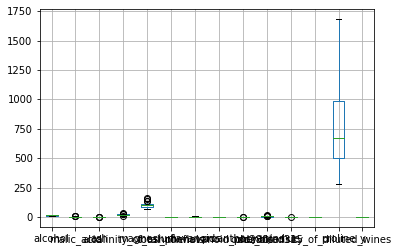

In [ ]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
column = list(df.columns)
boxplot = df.boxplot(column= column)  

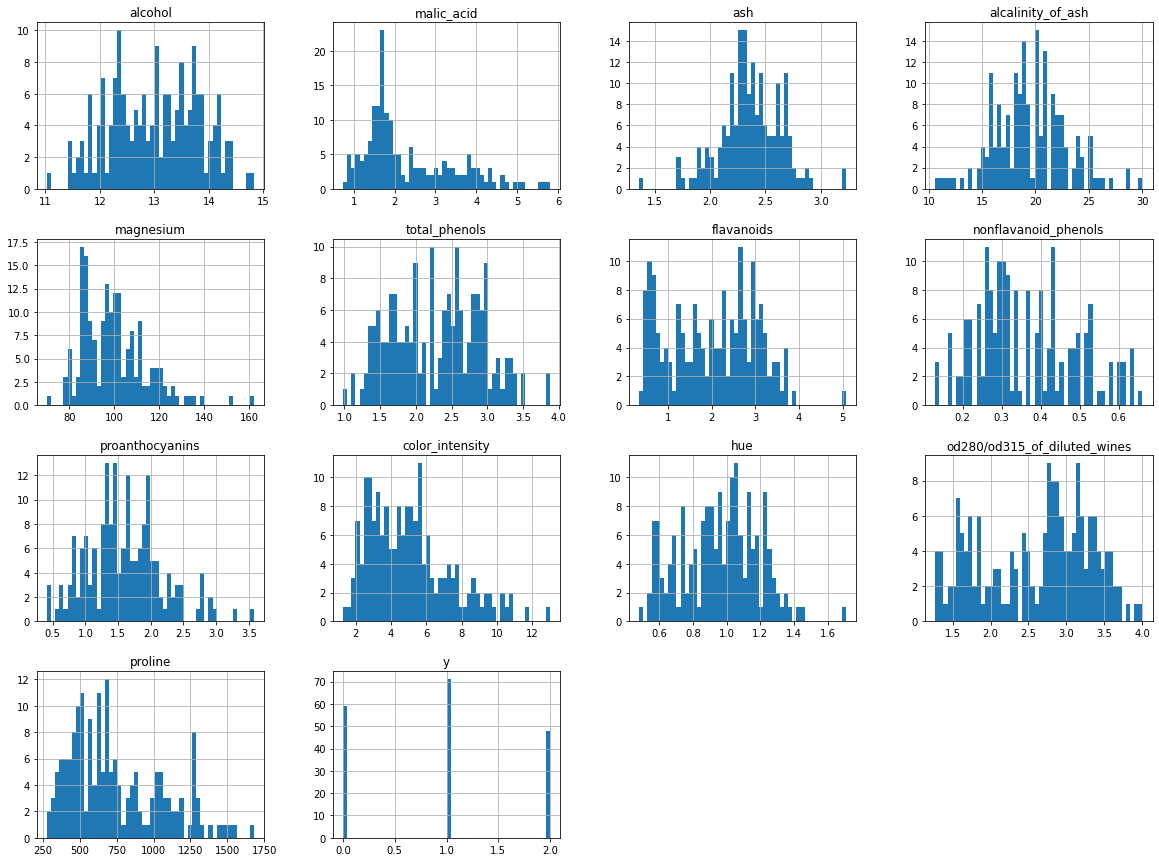

In [ ]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
_ = df.hist(bins=50, figsize=(20,15))

Let's do some multivariate analysis

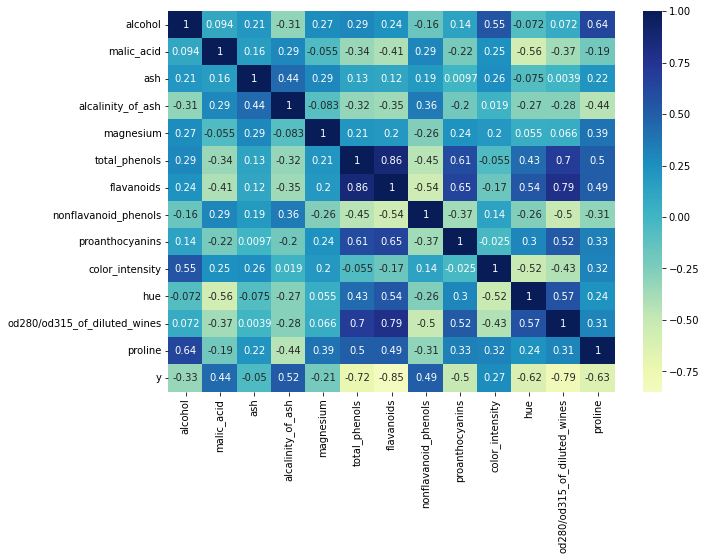

In [ ]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
correlations = df.corr()
#print(correlations['y'].sort_values(ascending=False))
# remove y from correlations
correlations_no_output = correlations.drop(labels = 'y', axis = 0)
correlations_no_output = correlations.drop(labels = 'y', axis = 1)

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
# YOUR CODE HERE
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(correlations_no_output, annot=True, center=0,  cmap="YlGnBu")

In [ ]:
# What is the highest correlation between features?
print('flavanoids and total_phenols are the highest correlation')


flavanoids and total_phenols are the highest correlation


You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
df_x = df.drop('y', axis=1)
num_features = list(df_x.columns)

colTransformer = ColumnTransformer([('num', StandardScaler(), num_features)
                                    ],
                                   remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
                                  )

x_processed = colTransformer.fit_transform(df_x)
print(x_processed.shape)

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
pca_n = PCA(n_components=2)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

(178, 13)


array([0.36198848, 0.55406338])

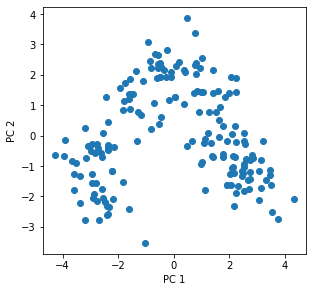

In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE
plt.figure(figsize=(16,10))
for i in range(1,2):
    plt.subplot(2, 3, i)
    plt.scatter(x_pca_n[:, i-1], x_pca_n[:, i])
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_pcs.pdf', dpi=300)
plt.show()

In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca_n = PCA(n_components=0.85)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116])

In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca_n = PCA(n_components=3)
x_pca_n = pca_n.fit_transform(x_processed)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969])

## Clustering

Let's see how many clusters does K-Means find.



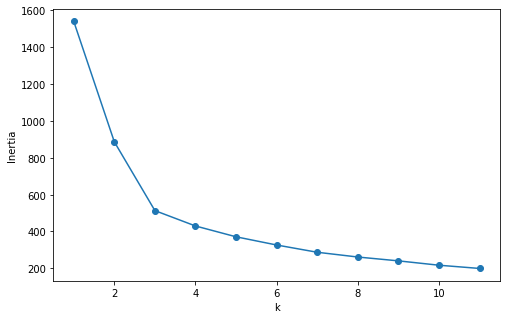

In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
inertias, sil = [], []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(x_pca_n)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(x_pca_n, y_pred))

# Let's plot inertia vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 12), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.savefig('elbow_moons.pdf', dpi=300)
plt.show()

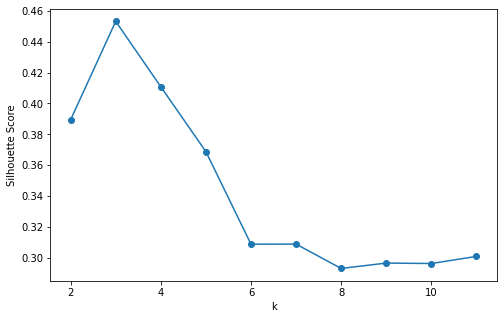

In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.plot(range(2, 12), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.savefig('elbow_moons_sil.pdf', dpi=300)
plt.show()

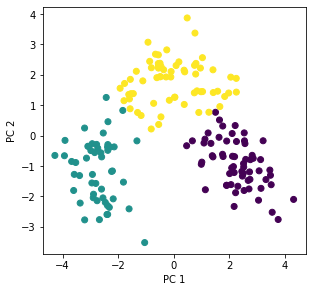

In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE
kmean = KMeans(n_clusters=3)
kmean.fit(x_pca_n)

plt.figure(figsize=(16,10))
for i in range(1, 2):
    plt.subplot(2, 3, i)
    plt.scatter(x_pca_n[:, i-1], x_pca_n[:, i], c=kmean.labels_)
    plt.xlabel('PC %d' % i)
    plt.ylabel('PC %d' % (i+1))
plt.savefig('students_pca_clusters_kmeans=2.pdf', dpi=300)
plt.show()

Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE
original = data.data.copy()
original['cluster'] = kmean.labels_
original

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

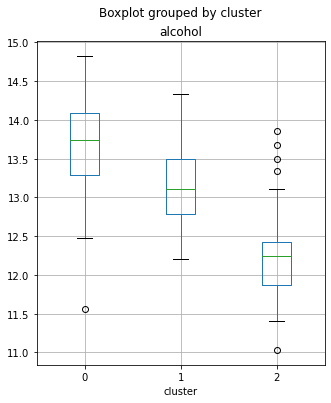

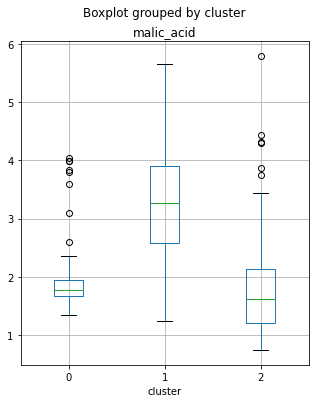

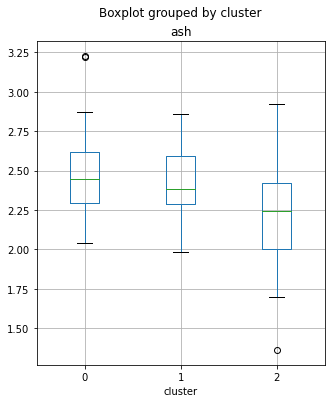

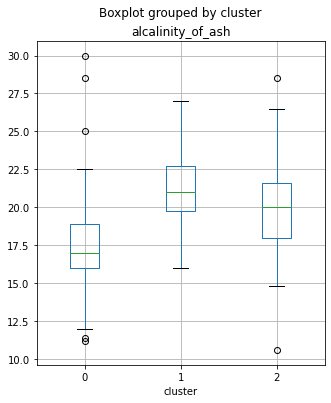

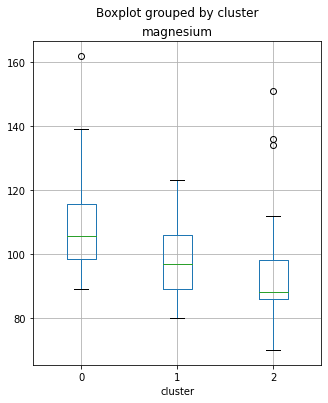

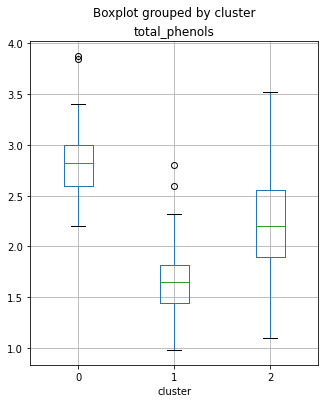

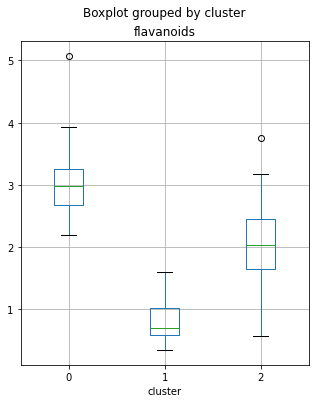

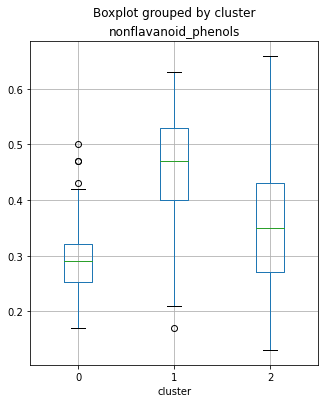

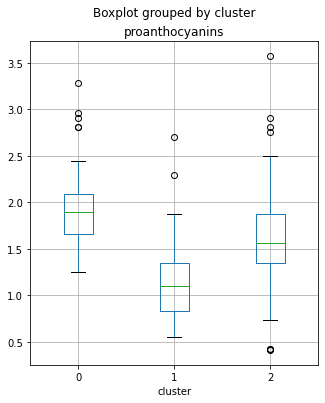

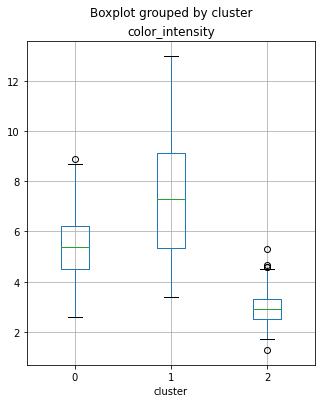

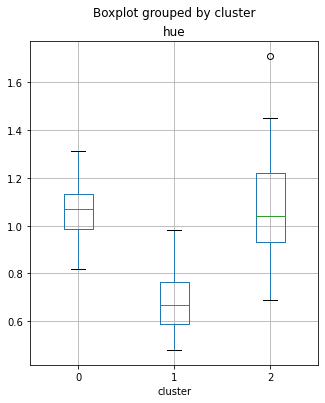

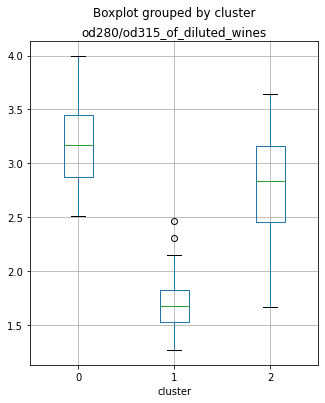

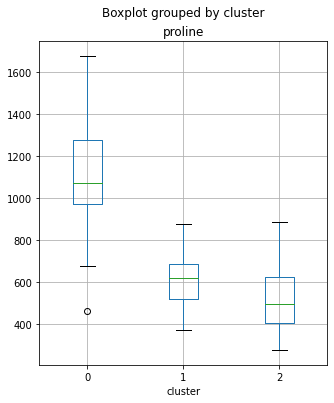

In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE
column = list(original.columns)
column.remove('cluster')
for i in column:
  boxplot = original.boxplot(column = i, by='cluster', figsize = (5,6))

Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!